In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *

In [20]:
train_data = get_data()
train_data = train_data[20:]

x_train_org = train_data["Avg_Temp_Pre_Day"].to_numpy()
x_train_org = np.reshape(x_train_org, (np.shape(x_train_org)[0], 1))
y_train_org = train_data["Avg_Temp"].to_numpy()
y_train_org = np.reshape(y_train_org, (np.shape(y_train_org)[0], 1))
x_train = standardize(x_train_org, x_train_org)
y_train = standardize(y_train_org, y_train_org)

network = NeuralNetwork(x_train[0:7].T, y_train[7], 1)

In [21]:
y_output = np.zeros(len(x_train)-7)
y_pred = np.zeros(len(x_train)-7)
for i in range(len(x_train)-7):
    network.train(x_train[i:i+7].T, y_train[i+7])
    y_output[i] = y_train[i+7]
    y_pred[i] = network.output[0]

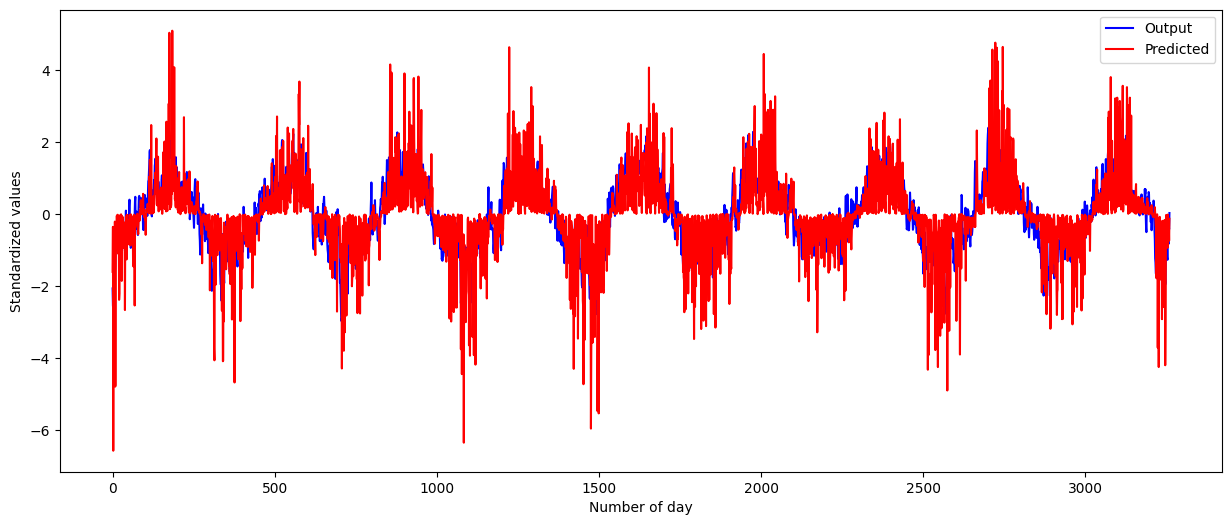

In [22]:
plt.figure(figsize=(15,6))
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(len(x_train)-7)
plt.plot(x, y_output, 'b', label="Output")
plt.plot(x, y_pred, 'r', label="Predicted")
plt.legend()
plt.show()

In [23]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.7818117512956761
MAE: 0.6600958237414495


# Predicting value

In [24]:
x_test = np.array([7,5,4,4,6,7,10])
x_test = np.reshape(x_test, (1, np.shape(x_test)[0]))
x_test = standardize(x_test, x_train_org)
network.predict(x_test)
print(unstandardize(network.output, x_train_org))

[[4.33093509]]
